El objetivo de este notebook es el de realizar un Análisis Exploratorio de Datos (EDA, por sus siglas en inglés, Exploratory Data Analysis), que es un enfoque de análisis de datos que se centra en resumir sus características principales, a menudo con métodos visuales. El objetivo principal del EDA es comprender la estructura de los datos, identificar patrones, detectar anomalías, etc.

In [117]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Cargamos las bases de datos dentro de un DataFrame
hechos= pd.read_excel('./Data/homicidios_buenos_aires.xlsx', sheet_name='HECHOS')
victimas= pd.read_excel('./Data/homicidios_buenos_aires.xlsx', sheet_name='VICTIMAS')

Empezaremos explorando el partado de 'HECHOS'

In [119]:
# Mostramos el DataFrame de Hechos que nos da informacion del accidente ocurrido
hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [120]:
# Mostramos la informacion del DataFrame
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [121]:
# Basandonos en la cantidad de datos nulos y la definicion de la varible en su diccionario descartamos las sig variables
hechos.drop(['Altura', 'Cruce', 'Calle','XY (CABA)','DD','HORA','Dirección Normalizada','PARTICIPANTES'], axis=1, inplace=True)
# Se eliminan las variables ya que tienen informacion que puede no ser significativa para el analisis o tiene muchos nulos

In [122]:
# Imprimimos la dimension del DataFrame
hechos.shape

(696, 13)

Una vez el DataFrame tiene las columnas deseadas empezamos a realizar visualizacion que nos proporcionen informacion.

In [123]:
hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,7,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO


Comenzamos hacer le análisis visual

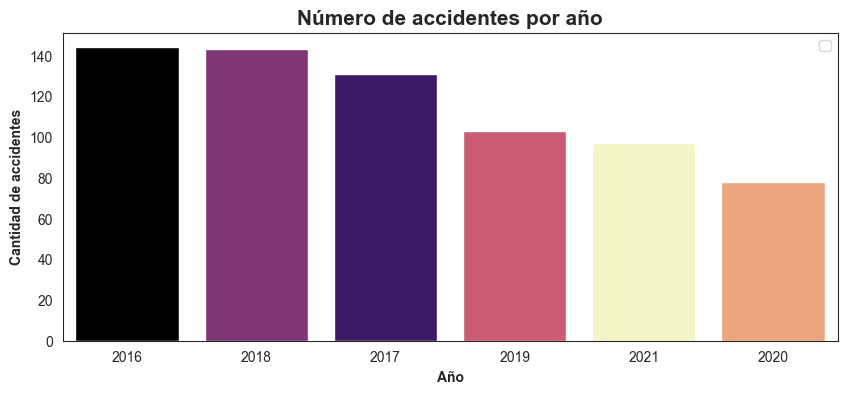

In [124]:
# Definimos las dimensiones del gráfico 
plt.figure(figsize=(10, 4))

# Seleccionamos El tipo de grafico a usar
# En este caso usamos el countplot para contar la cantidad de accidentes por año

sns.countplot(data= hechos, x= 'AAAA', hue='AAAA',palette='magma', order= hechos['AAAA'].value_counts().index)
# Definimos las etiquetas 

plt.xlabel('Año',fontweight='bold')
plt.legend("")
plt.ylabel('Cantidad de accidentes',fontweight='bold')
plt.title('Número de accidentes por año',fontsize=15, fontweight='bold')

# Mostramos la gráfica
plt.show()

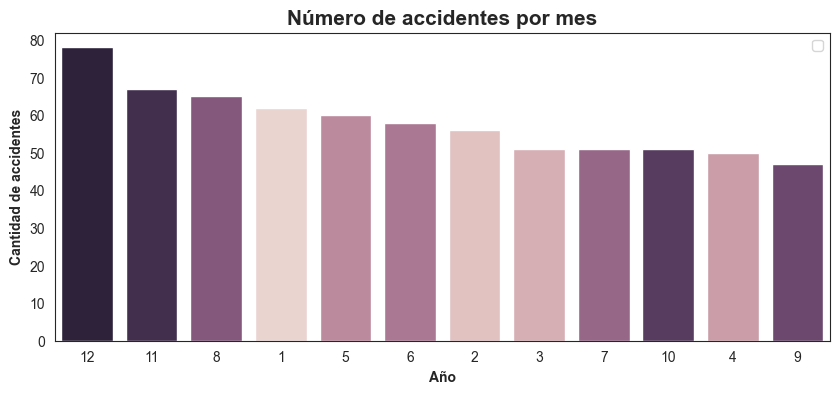

In [125]:
# Definimos las dimensiones del gráfico 
plt.figure(figsize=(10, 4))

# Seleccionamos El tipo de grafico a usar
# En este caso usamos el countplot para contar la cantidad de accidentes por mes
# order = hechos['MM'].value_counts().index y con esta ordenamos las barras de manera ascendente 
sns.countplot(data= hechos, x= 'MM', hue='MM', order = hechos['MM'].value_counts().index)

# Ddfinimos las etiquetas 
plt.xlabel('Año',fontweight='bold')
plt.legend("")
plt.ylabel('Cantidad de accidentes',fontweight='bold')
plt.title('Número de accidentes por mes',fontsize=15, fontweight='bold')

# Mostramos el gráfico 
plt.show()

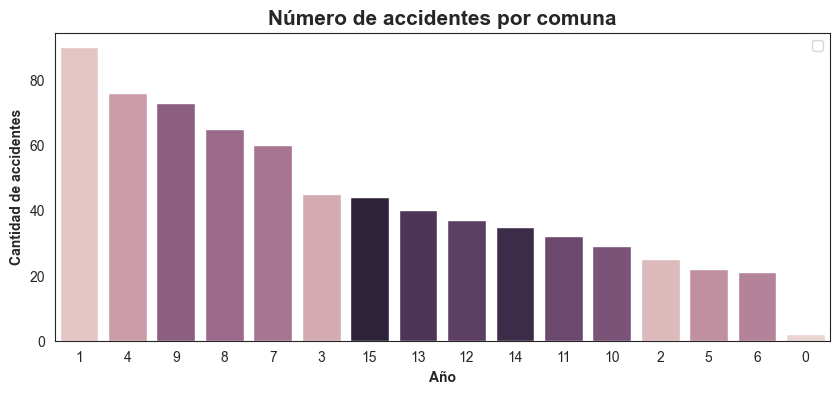

In [126]:
# Para este gráficos necesitaremos hacer unas agrupaciones con los datos orignales
# Para ello creamo una variable que nos abrupe las observaciones por comuna usando el método .groupby()
# Y una vez agrupadas contamos la cantidad de accidentes y creamos una columna con ese dato 
comunas= hechos.groupby('COMUNA').agg(N_accidentes=('N_VICTIMAS','size')).reset_index()
comunas = comunas.sort_values(by='N_accidentes', ascending=False)

# Definimos las dimensiones del gráfico 
plt.figure(figsize=(10, 4))

# Seleccionamos El tipo de grafico a usar
# Usamos un barplot que com eje 'x' tiene las comunas y como eje 'y' la cantidad de accidentes
# Ordenamos de manera asceniente la comunas basándose en el número de accidentes 
sns.barplot(data= comunas, x= 'COMUNA', y='N_accidentes', hue='COMUNA', order=comunas['COMUNA'])

# Definimos las etiquetas
plt.xlabel('Año',fontweight='bold')
plt.legend("")
plt.ylabel('Cantidad de accidentes',fontweight='bold')
plt.title('Número de accidentes por comuna',fontsize=15, fontweight='bold')

# Mostramos el gráfico 
plt.show()


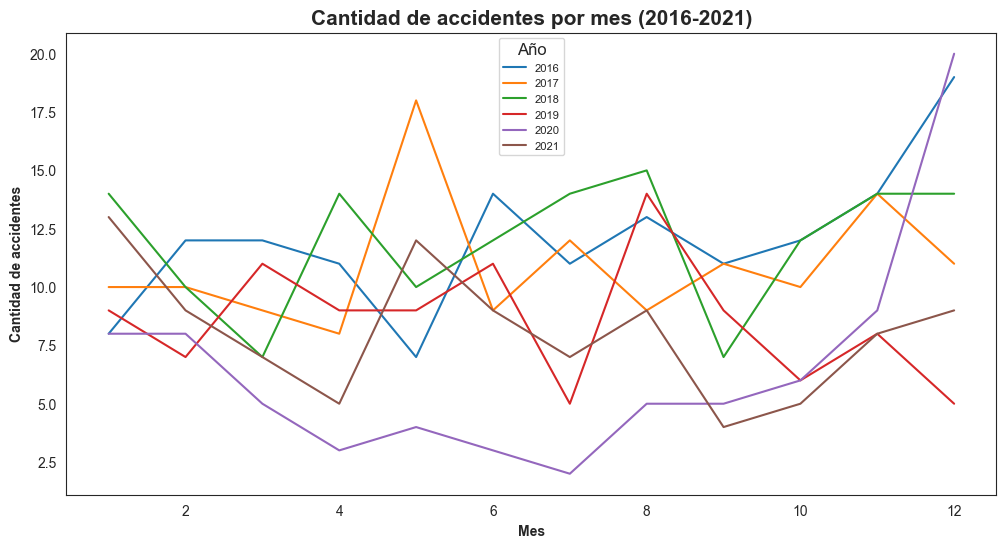

In [127]:
# Creamos un DataFrame que nos muestre los accidendes por año y mes
fecha_mes = hechos.groupby(['AAAA', 'MM']).agg(accidentes=('MM', 'size')).reset_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Iterar sobre los años para trazar una línea para cada uno
for año in fecha_mes['AAAA'].unique():
    datos_año = fecha_mes[fecha_mes['AAAA'] == año]
    plt.plot(datos_año['MM'], datos_año['accidentes'], label=año)

# Personalizar etiquetas y título
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Cantidad de accidentes', fontweight='bold')
plt.title('Cantidad de accidentes por mes (2016-2021)', fontsize=15, fontweight='bold')

# Mostrar leyenda
plt.legend(title='Año', title_fontsize='12', fontsize='8', loc='upper center')

# Mostrar el gráfico

plt.show()

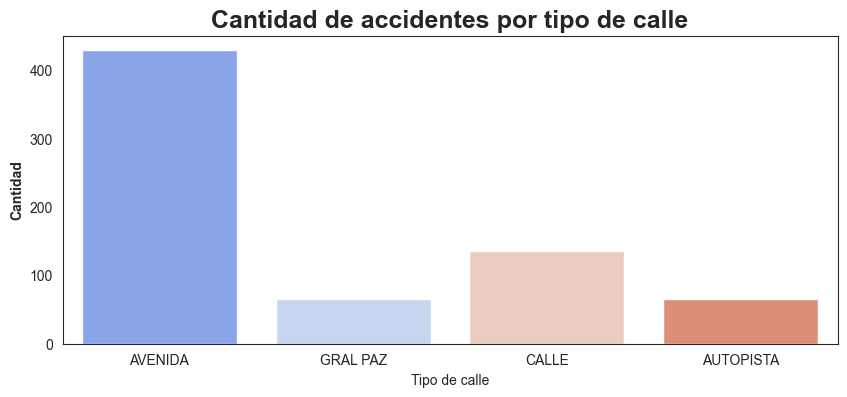

In [128]:
# Definimos las dimensiones del gráfico 
plt.figure(figsize=(10, 4))

# En este caso usamos el countplot para contar la cantidad de accidentes por tipo de calles
sns.countplot(data=hechos, x='TIPO_DE_CALLE', hue='TIPO_DE_CALLE', palette='coolwarm')

# Definimos las etiquetas
plt.xlabel("Tipo de calle")
plt.ylabel("Cantidad",fontweight="bold")
plt.title("Cantidad de accidentes por tipo de calle",fontweight="bold", fontsize= 18)

# Mostramos el gráfico
plt.show()


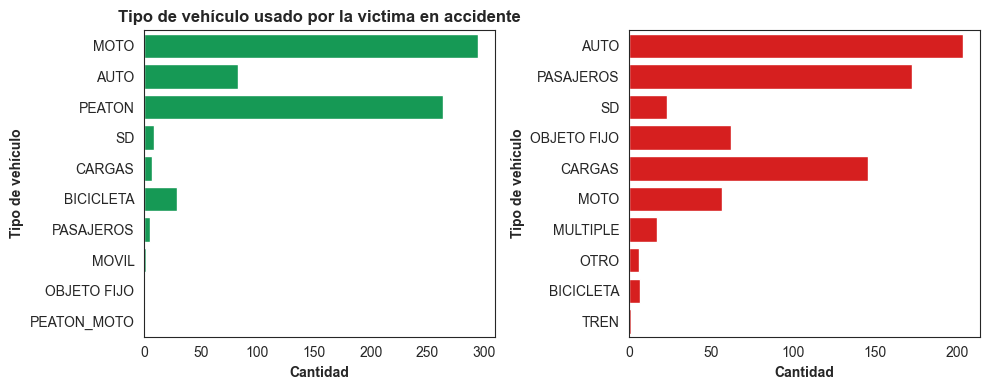

In [129]:
# Definimos el tamaño del gráfico 
plt.figure(figsize=(10, 4))

# Primer subgráfico
# Definimos la posición del primer subplot
plt.subplot(1, 2, 1)
# En este caso usamos el countplot para contar la cantidad de accidentes por tipo de vehículo usa por las víctimas
sns.countplot(data=hechos, y='VICTIMA', color= '#00AF54')
# Definimos las etiquetas 
plt.xlabel("Cantidad",fontweight="bold")
plt.ylabel("Tipo de vehículo",fontweight="bold")
plt.title("Tipo de vehículo usado por la victima en accidente",fontweight="bold")

# Segundo gráfico
# Definimos la posición del primer subplot
plt.subplot(1, 2, 2)
# En este caso usamos el countplot para contar la cantidad de accidentes por tipo de vehículo usa por los acusados
sns.countplot(data=hechos, y='ACUSADO', color= '#F50000')
# Definimos las etiquetas 
plt.xlabel("Cantidad",fontweight="bold")
plt.ylabel("Tipo de vehículo",fontweight="bold")
plt.tight_layout()
# Mostramos las etiquetas 
plt.show()

In [130]:
# Usando el metodo unique cada valor único que hay es esa colunma y vemos que hay entre los daots un 'SD' 
# Este dato nos vuelve la colomna entera de a tipo 'object'
hechos['HH'].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

In [131]:
# Por lo que transformamos la columna a númerica y con 'errors' le decimos que ignore aquello que no sea número
# Entoces lo que no pueda transformar en numero será dejado como NaN
hechos['HH']= pd.to_numeric(hechos['HH'], errors='coerce')

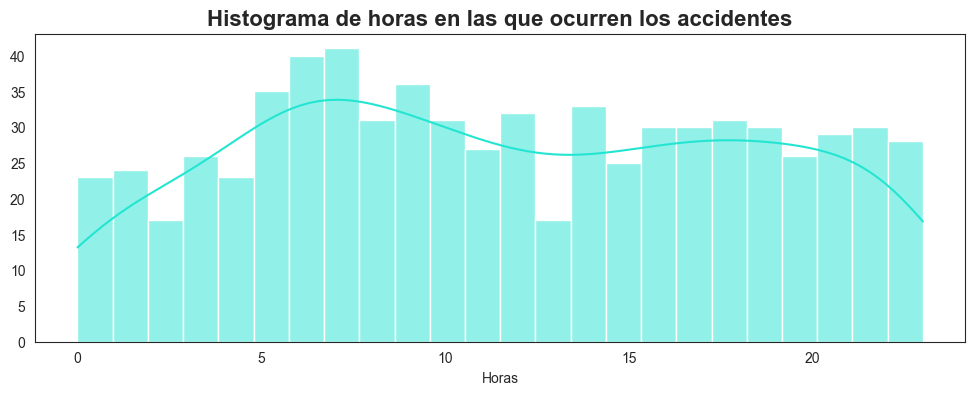

In [132]:
# Definimos el tamaño del gráfico 
plt.figure(figsize=(12, 4))

''' Un histograma se utiliza para visualizar la distribución de un conjunto de datos continuos. 
Es una representación gráfica que muestra la frecuencia o el número de observaciones dentro de intervalos (o "bins")
específicos de valores.'''


# Seleccionamos el tipo de grafico en te caso usamos un histograma
sns.histplot(data=hechos, x='HH', color='#24E5D2', bins=24, kde= True)

# Definimos las etiquetas
plt.xlabel("Horas")
plt.ylabel("")
plt.title("Histograma de horas en las que ocurren los accidentes",fontweight="bold", fontsize=16)

# Mostramos el gráfico
plt.show()

En este caso este histograma nos muestras las hora del dia donde mas accidentes se registran.

Una vez examinado de los datos de hechos, seguimos a realizarles un analizamos los datos de las victimas.

In [133]:
# Mostranos los datos
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [134]:
# Motramos la información de las columnas del DataFrame
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [135]:
# Mostramos el tamaño del DataFrame
victimas.shape

(717, 10)

In [136]:
# Tomamos las columnas categóricas
columns= ['ROL','VICTIMA','SEXO']

# Y con un ciclo for imprimimos las categórias de y cuabtas observaciones tiene cada categória 
for colunm in columns:
    print(victimas[colunm].value_counts(),'\n')

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64 

VICTIMA
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64 

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64 



In [137]:
# Hacemos uso del metod replace para reemplazar valores dentro de las columnas
victimas.replace({'ROL': 'PASAJERO_ACOMPAÑANTE'}, 'PASAJERO ACOMPAÑANTE', inplace=True)

In [138]:
# Hacemos uso del metod replace para reemplazar valores dentro de las columnas
victimas.replace({'SEXO', 'SD'}, victimas['SEXO'].mode()[0], inplace= True)

In [139]:
# Hacemos uso del metod replace para reemplazar valores dentro de las columnas
victimas.replace({'ROL', 'SD'}, victimas['ROL'].mode()[0], inplace= True)

In [140]:
# Como observamos que la variable 'EDAD' es de tipo 'object' en lugar de tipo númerico, buscamos los detalles
# Usando el metodo unique cada valor único que hay es esa colunma y vemos que hay entre los daots un 'SD' 
# Este dato nos vuelve la colomna entera de a tipo 'object'
victimas['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'MASCULINO', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53,
       51, 40, 87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46,
       83, 39, 28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85,
       1, 15, 13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68,
       91, 64, 5, 88], dtype=object)

In [141]:
# Por lo que transformamos la columna a númerica y con 'errors' le decimos que ignore aquello que no sea número
# Entoces lo que no pueda transformar en numero será dejado como NaN
victimas['EDAD'] = pd.to_numeric(victimas['EDAD'], errors='coerce')

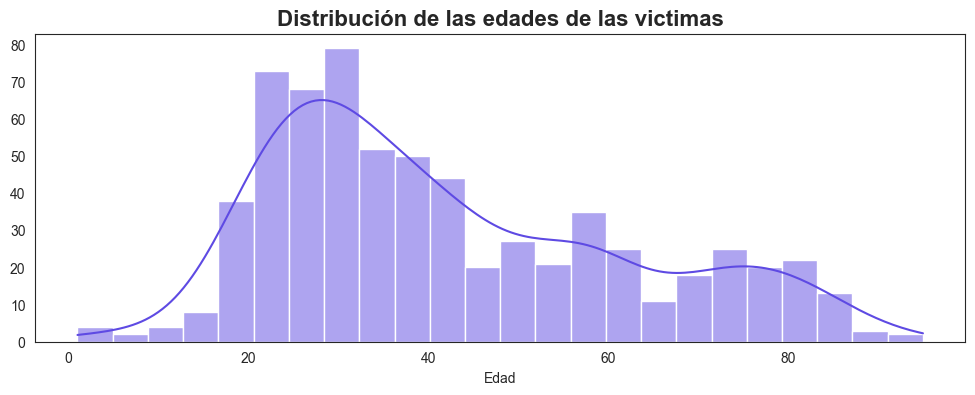

In [142]:
# Definimos el tamaño del gráfico 
plt.figure(figsize=(12, 4))

''' Un histograma se utiliza para visualizar la distribución de un conjunto de datos continuos. 
Es una representación gráfica que muestra la frecuencia o el número de observaciones dentro de intervalos (o "bins")
específicos de valores.'''


# Seleccionamos el tipo de grafico en te caso usamos un histograma
sns.histplot(data=victimas, x='EDAD', color='#5E4AE3', bins=24, kde= True)

# Definimos las etiquetas
plt.xlabel("Edad")
plt.ylabel("")
plt.title("Distribución de las edades de las victimas",fontweight="bold", fontsize=16)

# Mostramos el gráfico
plt.show()

Para este caso este histograma nos muesta la frecuencia de las edades de las personas que son victimas de acciden viales.

In [143]:
# Usamos el método replace reemplamos los NaN por la media de las edades
victimas.replace({'EDAD',np.nan}, round(np.mean(victimas['EDAD']),0), inplace= True)

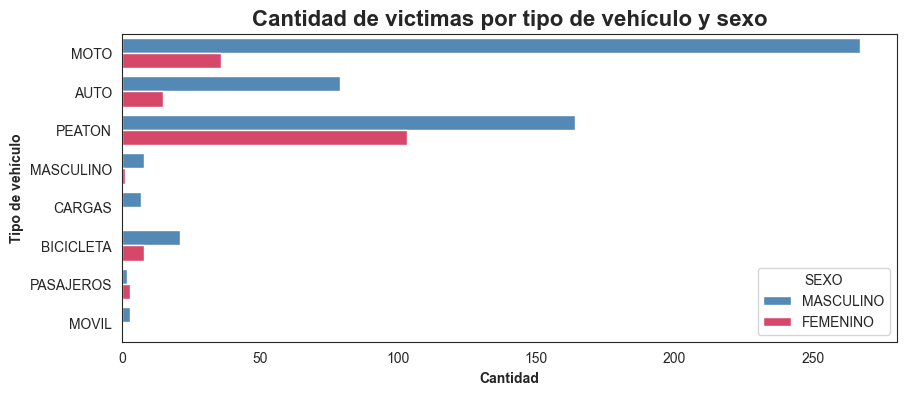

In [144]:
# Definimos el tamaño del gráfico 
plt.figure(figsize=(10, 4))

# En este caso usamos el countplot para contar la cantidad de accidentes por tipo de vehículo y sexo.
sns.countplot(data= victimas, y= 'VICTIMA', hue='SEXO', palette=['#4489C5', '#ED315D'])

# Definimos las etiqueas 
plt.xlabel("Cantidad", fontweight='bold')
plt.ylabel("Tipo de vehículo", fontweight='bold')
plt.title("Cantidad de victimas por tipo de vehículo y sexo",fontweight="bold", fontsize=16)

# Mostramos el gráfico 
plt.show()

De esta manera terminamos el EDA, en el cual se exploraron los datos y se encontraron ciertos patrones e imformación que nos ayuda entender los datos de mejor manera.

In [145]:
# Guardamos los datos procesados 
hechos.to_excel('Data/Hechos.xlsx',index=False)
victimas.to_excel('Data/Victimas.xlsx', index= False)